## dataset, accumulated overtime, sentiment, if a number is used, if quotes used


In [5]:
# imports
!pip install bs4
import numpy as np
import pandas as pd
from selenium import webdriver
import time # this is for sleeping
from bs4 import BeautifulSoup
import re
from afinn import Afinn
import nltk
import gensim
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [6]:
# initializing the browser and going to a web page

# open Firefox
browser = webdriver.Firefox(executable_path="/Users/stellasotos/desktop/geckodriver")

# go to the web page that we want to scrape from
browser.get('https://www.buzzfeed.com/life')

# wait for browser/page to load before doing anything else
'''
If you don't do this, selenium may get confused while running 
the next command because whatever object it looks for may not yet be there.
So when running a command that will open a new web page it is usually
a good idea to sleep for a few seconds.
''' 
time.sleep(2)

In [16]:
tr_week = browser.find_element_by_xpath("//ul[@class='list--numbered trending-posts trending-posts-top hidden']")
#element2.find_element_by_xpath(".//p[@class='test']").text 

titles_ar = tr_week.find_elements_by_xpath("//a[@class='trending-post-title']")
views_ar = browser.find_elements_by_class_name("trending-post-views")
titles = []
views = []


for title in titles_ar:
    titles.append(title.get_attribute('innerHTML'))

for view in views_ar:
    views.append(view.get_attribute('innerHTML'))

titles= titles[20:]
print(titles)
print(views)

NoSuchElementException: Message: Unable to locate element: //ul[@class='lede ']


In [ ]:
#cleaning views
cl_views =[]
for view in views:
    cl_views.append(int(re.sub('[^0-9]','', view)))
cl_views

In [ ]:
#cleaning titles
cl_titles =[]
for title in titles:
    cl_titles.append(re.sub('[\']', '\'', title))
cl_titles

In [ ]:
numbers = []
quotes =[]
punctuation = []
list_ar = []
money = []
nums = set('0123456789')
quo = set('\"\'')
punc = set("?!,.")
mon = set("$")
for t in cl_titles:
    if any((n in nums) for n in t[:1]):
        list_ar.append(1)
    else:
        list_ar.append(0)
    if any((n in nums) for n in t):
        numbers.append(1)
    else:
        numbers.append(0)
    if any((q in quo) for q in t):
        quotes.append(1)
    else:
        quotes.append(0)
    if any((p in punc) for p in t):
        punctuation.append(1)
    else:
        punctuation.append(0)
    if any((m in mon) for m in t):
        money.append(1)
    else:
        money.append(0)

In [ ]:
names = ["Harry","Kevin","Kristen","Kylie","Finn","Chris","Anna","Kris","Ryan","Blake","Scott","Kourtney","Taylor","Sophie","Kim","Katy","Beyonce","Jason"]
raunch = ["Sex","Goddamn","Fuck","Shit","Damn","Hell","Batshit","Assholes"]
names_ar= []
r_ar=[]
for t in cl_titles:
    nb = False
    rb = False
    for n in names:
        if n in t:
            nb = True
    if nb:
        names_ar.append(1)
    else:
        names_ar.append(0)
    for r in raunch:
        if r in t:
            rb = True
    if rb:
        r_ar.append(1)
    else:
        r_ar.append(0)
            
        
r_ar

In [17]:
#sentiment
afinn = Afinn()
sent = []
# get sentiment for each document in the corpus 
# (unclean corpus because the clean one has some words the algorithm won't recognize)
for i in range(len(cl_titles)):
    sent.append(afinn.score(cl_titles[i]))
sent

NameError: name 'cl_titles' is not defined

In [9]:
d = {'Title':pd.Series(cl_titles),'Views':pd.Series(cl_views),'Numbers':pd.Series(numbers),'Quotes':pd.Series(quotes), 'Punctuation':pd.Series(punctuation), 'List':pd.Series(list_ar), 'Sentiment':pd.Series(sent), 'Money':pd.Series(money),'Names':pd.Series(names_ar),'Raunchy': pd.Series(r_ar) }
df = pd.DataFrame(d)
df

,List,Money,Names,Numbers,Punctuation,Quotes,Raunchy,Sentiment,Title,Views
0,1,0,0,1,0,1,0,4.0,17 Husbands Who Are Proof That You Can't Win A...,1125268
1,1,0,0,1,0,0,1,-6.0,21 Times People Lied And The Internet Sherlock...,830430
2,1,0,0,1,0,0,0,2.0,22 Bizarre Alcohol Combinations That Actually ...,596213
3,0,0,0,0,0,0,0,-2.0,People Are Smashing Their Keurig Coffee Makers...,559020
4,0,0,1,0,0,0,0,0.0,Scott Disick Just Went In On Kourtney Kardashian,525950
5,1,0,0,1,0,0,0,1.0,37 Cool And Random Things You Can Probably Afford,522990
6,0,0,0,1,0,1,0,-8.0,"There's A Heartbreaking Detail In ""Stranger Th...",517931
7,0,0,0,0,0,1,0,2.0,"This Deleted ""Titanic"" Scene Would Have Made T...",507821
8,0,0,0,0,1,1,0,-3.0,J. Crew Just Apologized For A Black Model's Se...,500562
9,1,0,0,1,0,0,0,-2.0,26 Pictures That Will Make You Absolutely Sick...,499606


In [10]:
#never run this again!!!
#df.to_csv("buzz_data.csv")


In [11]:
#Run this with each new set of popular stories
with open('buzz_data.csv', 'a') as f:
    df.to_csv(f, header=False)

In [25]:
##FROM NOW ON ONLY RUN FROM HERE OR BELOW
all_df = pd.read_csv('buzz_data.csv')
del all_df["Unnamed: 0"]
all_df

,List,Money,Names,Numbers,Punctuation,Quotes,Raunchy,Sentiment,Title,Views
0,1,0,0,1,1,1,0,0.0,"13 Little Body Tricks That'll Make You Say ""Wh...",800000
1,0,0,1,1,1,0,0,0.0,"Actor Harry Dreyfuss: When I Was 18, Kevin Spa...",700000
2,0,0,0,0,0,1,0,0.0,Shop At Target And We'll Guess Your Exact Age,600000
3,0,0,1,0,0,0,1,0.0,This Is What Kristen Bell Did When Her Kids Wa...,600000
4,1,0,0,1,0,0,0,-3.0,19 Things People With Vaginas Do That They Fee...,600000
5,0,0,0,1,0,0,1,0.0,These 17 Responses To Ex Texts Are So Goddamn ...,600000
6,0,0,1,0,0,1,0,0.0,Kylie Jenner Posted Her First Full-Body Photo ...,500000
7,0,0,1,0,1,0,0,-2.0,"Finn Wolfhard Was Called Rude By Fans, And His...",500000
8,1,0,0,1,0,0,1,-6.0,9 Husbands And 8 Boyfriends Who Confused The F...,500000
9,1,0,0,1,1,0,1,-3.0,17 Times “Say Yes The Dress” Made The Internet...,500000


In [26]:
#eliminate any repition
all_df.drop_duplicates(subset='Title',keep ='last', inplace = True)
all_df.to_csv("buzz_data.csv")


In [27]:
views_cat = []
for v in all_df['Views']:
    if v<500000:
        views_cat.append(400000)
    elif v<600000:
        views_cat.append(500000)
    elif v<700000:
        views_cat.append(600000)
    elif v<800000:
        views_cat.append(700000)
    elif v<900000:
        views_cat.append(800000)
    elif v<1000000:
        views_cat.append(900000)
    else:
        views_cat.append(1000000)
views_cat
all_df['Views']= views_cat
all_df.to_csv("buzz_data.csv")

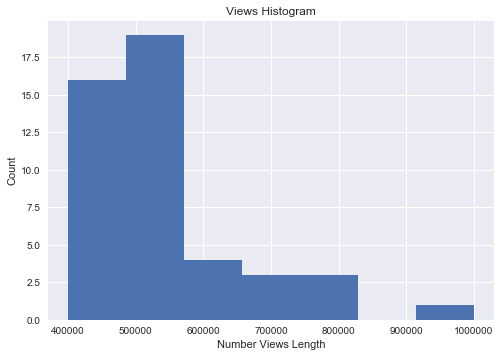

In [28]:
# plot the histogram
plt.hist(all_df['Views'],bins = 7)
plt.title('Views Histogram')
# give the histogram an x-label
plt.xlabel('Number Views Length')
# give the histogram a y-label
plt.ylabel('Count')
# print the plot
plt.show()

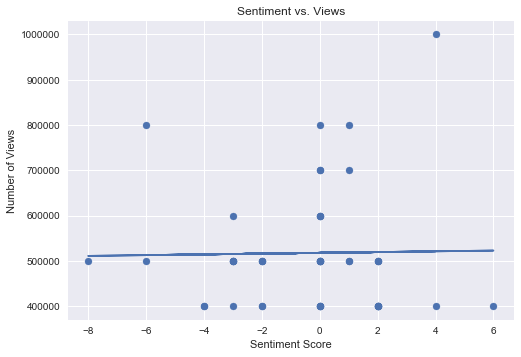

In [29]:
# Views vs Sentiment
x = all_df['Sentiment']
y = all_df['Views']
plt.scatter(x,y)
plt.title("Sentiment vs. Views")
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Views')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, '-')
plt.show()

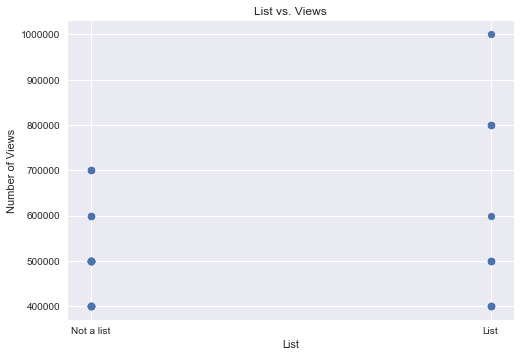

In [30]:
# Views vs List
x = all_df['List']
y = all_df['Views']
plt.scatter(x,y)
plt.title("List vs. Views")
plt.xlabel('List')
plt.ylabel('Number of Views')
plt.xticks([0,1] , ("Not a list","List"))
#plt.axis('tight')
plt.show()


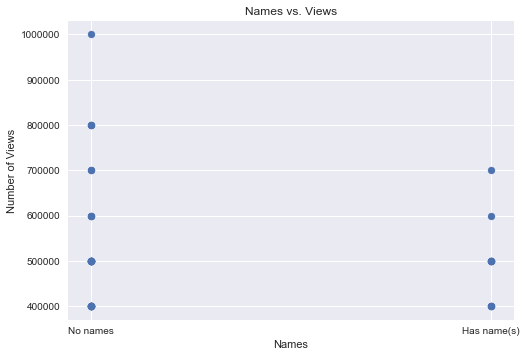

In [31]:
# Views vs Names
x = all_df['Names']
y = all_df['Views']
plt.scatter(x,y)
plt.title("Names vs. Views")
plt.xlabel('Names')
plt.ylabel('Number of Views')
plt.xticks([0,1] , ("No names","Has name(s)"))
#plt.axis('tight')
plt.show()

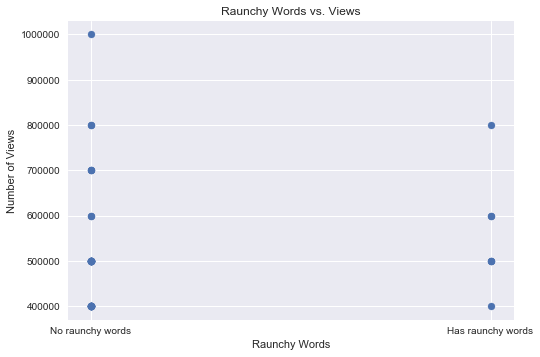

In [32]:
# Views vs Names
x = all_df['Raunchy']
y = all_df['Views']
plt.scatter(x,y)
plt.title("Raunchy Words vs. Views")
plt.xlabel('Raunchy Words')
plt.ylabel('Number of Views')
plt.xticks([0,1] , ("No raunchy words","Has raunchy words"))
#plt.axis('tight')
plt.show()

In [33]:
train, test = train_test_split(all_df, test_size = 0.2)

# train sets
train_x = train.drop('Views', 1)
train_x = train_x.drop('Title', 1)
train_y = train['Views']

# test sets
test_x = test.drop('Views', 1)
test_x = test_x.drop('Title', 1)
test_y = test['Views']

In [34]:
# model
tree = DecisionTreeClassifier(criterion = "entropy")

# train
tree.fit(train_x, train_y)

# predict
tree_predictions = tree.predict(test_x)

In [35]:
pd.DataFrame({'Gain': tree.feature_importances_}, index = train_x.columns).sort_values('Gain', ascending = False)

,Gain
Sentiment,0.435027
List,0.146472
Names,0.133982
Quotes,0.112914
Punctuation,0.091979
Numbers,0.039813
Raunchy,0.039813
Money,0.000000


In [36]:
# model
bag = BaggingClassifier()

# train
bag.fit(train_x, train_y)

# predict
bag_predictions = bag.predict(test_x)

# confusion matrix
pd.crosstab(test_y, bag_predictions, rownames=['Actual'], colnames = ['Predicted:'], margins = True)

Predicted:,400000,500000,600000,800000,All
Actual,,,,,
400000,1,2,2,0,5
500000,0,1,1,2,4
600000,0,1,0,0,1
All,1,4,3,2,10


In [37]:
#your_title = "13 ways to be as cool as Finn"
#predict = bag.predict(your_title)
#predict

In [38]:
from sklearn.linear_model import LinearRegression # sklearn Linear Regression regressor
from sklearn.model_selection import train_test_split # Sklearn train_test_split


# Partition 80% of the data for training and 20% for testing
train, test = train_test_split(all_df, test_size = 0.2)

# training predictors
x_train = train.drop(['Views'], 1)
x_train = x_train.drop('Title', 1)
# training y-values
y_train = train['Views']

# testing predictors
x_test = train.drop(['Views'], 1)
x_test = x_test.drop('Title', 1)

# testing y-values
y_test = train['Views']


# Set our regression model to Linear Regression()
regr = LinearRegression()

# Train our model ('fit' synonomous to 'train)
regr.fit(x_train, y_train)

# Let's get our predictions of the y-test values
predictions = pd.Series(regr.predict(x_test))


# set the indexes of the predictions and actual values to the same thing so that we can perform arithmetic
predictions.index = range(len(predictions))
y_test.index = range(len(y_test))

# Find the differences between the actual and predicted values
differences = abs(predictions - y_test)

# calculating the percent error
errors = differences/y_test * 100
mean_error = np.mean(errors)

# Getting an r^2 value
from sklearn.metrics import r2_score
r2 = r2_score(y_true = y_test, y_pred = predictions)

print('Average difference: ', np.mean(differences))
print('\nAverage Percent Error:', mean_error)
print('\nIntercept:', regr.intercept_)
print('\nRegression Coefficients:', regr.coef_)
print('\nr^2:', r2)

Average difference:  101817.41111426195

Average Percent Error: 19.27174202406014

Intercept: 453659.406585

Regression Coefficients: [ 81937.45659816  61063.04942901 -13948.12581058  20732.10020084
  84812.79669917  58226.21668242  17654.34923139   -198.56823982]

r^2: 0.20566380773


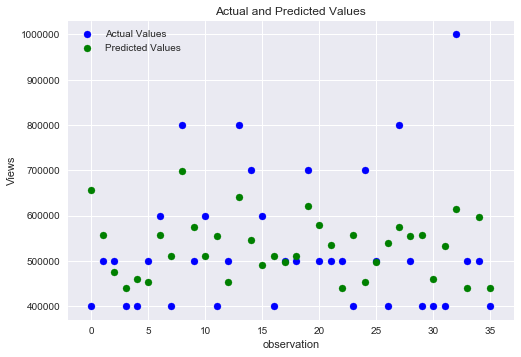

In [39]:
plt.scatter(y_test.index, y_test, color = 'b')
plt.scatter(predictions.index, predictions, color = 'g')
plt.legend(["Actual Values", "Predicted Values"])
plt.xlabel('observation')
plt.ylabel('Views')
plt.title('Actual and Predicted Values')
plt.show()

In [40]:
#now we are going to drop bad variables
#drop variables that don't matter
all_df = all_df.drop('Numbers',1)
all_df = all_df.drop('Punctuation',1)
all_df = all_df.drop('Money',1)
all_df

,List,Names,Quotes,Raunchy,Sentiment,Title,Views
0,1,0,1,0,0.0,"13 Little Body Tricks That'll Make You Say ""Wh...",800000
1,0,1,0,0,0.0,"Actor Harry Dreyfuss: When I Was 18, Kevin Spa...",700000
2,0,0,1,0,0.0,Shop At Target And We'll Guess Your Exact Age,600000
3,0,1,0,1,0.0,This Is What Kristen Bell Did When Her Kids Wa...,600000
4,1,0,0,0,-3.0,19 Things People With Vaginas Do That They Fee...,600000
5,0,0,0,1,0.0,These 17 Responses To Ex Texts Are So Goddamn ...,600000
6,0,1,1,0,0.0,Kylie Jenner Posted Her First Full-Body Photo ...,500000
7,0,1,0,0,-2.0,"Finn Wolfhard Was Called Rude By Fans, And His...",500000
8,1,0,0,1,-6.0,9 Husbands And 8 Boyfriends Who Confused The F...,500000
9,1,0,0,1,-3.0,17 Times “Say Yes The Dress” Made The Internet...,500000


In [41]:
train, test = train_test_split(all_df, test_size = 0.2)

# train sets
train_x = train.drop('Views', 1)
train_x = train_x.drop('Title', 1)
train_y = train['Views']

# test sets
test_x = test.drop('Views', 1)
test_x = test_x.drop('Title', 1)
test_y = test['Views']

In [42]:
# model
tree = DecisionTreeClassifier(criterion = "entropy")

# train
tree.fit(train_x, train_y)

# predict
tree_predictions = tree.predict(test_x)

In [43]:
pd.DataFrame({'Gain': tree.feature_importances_}, index = train_x.columns).sort_values('Gain', ascending = False)

,Gain
Sentiment,0.490702
Quotes,0.201486
List,0.144436
Raunchy,0.091153
Names,0.072223


In [44]:
from sklearn.linear_model import LinearRegression # sklearn Linear Regression regressor
from sklearn.model_selection import train_test_split # Sklearn train_test_split


# Partition 80% of the data for training and 20% for testing
train, test = train_test_split(all_df, test_size = 0.2)

# training predictors
x_train = train.drop(['Views'], 1)
x_train = x_train.drop('Title', 1)
# training y-values
y_train = train['Views']

# testing predictors
x_test = train.drop(['Views'], 1)
x_test = x_test.drop('Title', 1)

# testing y-values
y_test = train['Views']


# Set our regression model to Linear Regression()
regr = LinearRegression()

# Train our model ('fit' synonomous to 'train)
regr.fit(x_train, y_train)

# Let's get our predictions of the y-test values
predictions = pd.Series(regr.predict(x_test))


# set the indexes of the predictions and actual values to the same thing so that we can perform arithmetic
predictions.index = range(len(predictions))
y_test.index = range(len(y_test))

# Find the differences between the actual and predicted values
differences = abs(predictions - y_test)

# calculating the percent error
errors = differences/y_test * 100
mean_error = np.mean(errors)

# Getting an r^2 value
from sklearn.metrics import r2_score
r2 = r2_score(y_true = y_test, y_pred = predictions)

print('Average difference: ', np.mean(differences))
print('\nAverage Percent Error:', mean_error)
print('\nIntercept:', regr.intercept_)
print('\nRegression Coefficients:', regr.coef_)
print('\nr^2:', r2)

Average difference:  88121.94373843873

Average Percent Error: 17.168831943255515

Intercept: 474222.382912

Regression Coefficients: [ 57031.45828403 -17573.14993503  13160.34660333  70859.43631589
  -7023.22631461]

r^2: 0.130628910215


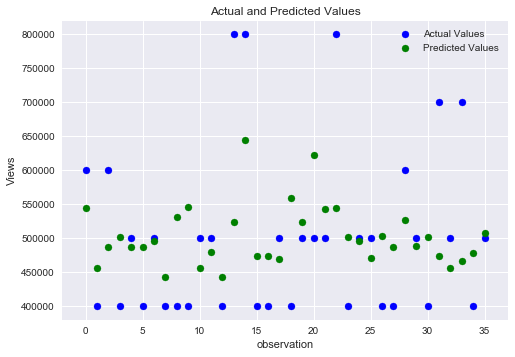

In [45]:
plt.scatter(y_test.index, y_test, color = 'b')
plt.scatter(predictions.index, predictions, color = 'g')
plt.legend(["Actual Values", "Predicted Values"])
plt.xlabel('observation')
plt.ylabel('Views')
plt.title('Actual and Predicted Values')
plt.show()
